# Question: The question I am trying to answer is what authors are the most positive and most negative in their writing, and for the most positive and negative authors, what words do they use the most and what are they talking about?

In [1]:
import os
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from nltk.text import Text
import matplotlib.pyplot as plt
data_dir = "./data/"
nltk.data.path.append(os.path.abspath(data_dir))
nltk.download('punkt') # for tokenizing
import pandas as pd



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Helper function to read data from a labeled directory
def read_data_from_directory(directory_path):
    authors = os.listdir(directory_path)
    texts = []
    labels = []
    for author in authors:
        author_path = os.path.join(directory_path, author)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                texts.append(f.read())
                labels.append(author)
    return texts, labels

# Reading the training and test data
train_texts, train_labels = read_data_from_directory("./data/ReutersC50/C50train")
test_texts, test_labels = read_data_from_directory("./data/ReutersC50/C50test")

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon', download_dir=data_dir)
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to ./data/...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
from tqdm import tqdm
def get_sentiment_scores(text):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(text)
    return sentiment_scores


author_names = [
    "AaronPressman",
    "AlanCrosby",
    "AlexanderSmith",
    "BradDorfman",
    "BernardHickey",
    "DarrenSchuettler",
    "DavidLawder",
    "EdnaFernandes",
    "EricAuchard",
    "FumikoFujisaki",
    "GrahamEarnshaw",
    "HeatherScoffield",
    "JaneMacartney",
    "JanLopatka",
    "JimGilchrist",
    "JoeOrtiz",
    "JohnMastrini",
    "JonathanBirt",
    "JoWinterbottom"
]


author_sentiment_scores = {}


for author in author_names:
    author_indices = [index for index, label in enumerate(train_labels) if label == author]
    sentiment_scores_list = []
    
    for index in tqdm(author_indices, desc=f"Processing {author}'s texts"):
        text = train_texts[index]
        sentiment_scores = get_sentiment_scores(text)
        sentiment_scores['document'] = author
        sentiment_scores_list.append(sentiment_scores)
    
    author_sentiment_scores[author] = pd.DataFrame(sentiment_scores_list)


for author, sentiment_df in author_sentiment_scores.items():
    average_compound_score = sentiment_df['compound'].mean()
    print(f"{author}: Average Compound Sentiment Score: {average_compound_score:.2f}")

Processing JoWinterbottom's texts: 100%|██████████| 50/50 [00:00<00:00, 59.54it/s]

AaronPressman: Average Compound Sentiment Score: 0.67
AlanCrosby: Average Compound Sentiment Score: 0.55
AlexanderSmith: Average Compound Sentiment Score: 0.82
BradDorfman: Average Compound Sentiment Score: 0.68
BernardHickey: Average Compound Sentiment Score: 0.79
DarrenSchuettler: Average Compound Sentiment Score: 0.67
DavidLawder: Average Compound Sentiment Score: 0.50
EdnaFernandes: Average Compound Sentiment Score: 0.40
EricAuchard: Average Compound Sentiment Score: 0.83
FumikoFujisaki: Average Compound Sentiment Score: 0.19
GrahamEarnshaw: Average Compound Sentiment Score: 0.77
HeatherScoffield: Average Compound Sentiment Score: 0.55
JaneMacartney: Average Compound Sentiment Score: 0.34
JanLopatka: Average Compound Sentiment Score: 0.19
JimGilchrist: Average Compound Sentiment Score: 0.66
JoeOrtiz: Average Compound Sentiment Score: 0.47
JohnMastrini: Average Compound Sentiment Score: 0.30
JonathanBirt: Average Compound Sentiment Score: 0.64
JoWinterbottom: Average Compound Sentim

In [5]:
author_sentiment_scores

{'AaronPressman':       neg    neu    pos  compound       document
 0   0.175  0.732  0.093   -0.9899  AaronPressman
 1   0.062  0.875  0.063   -0.6586  AaronPressman
 2   0.000  0.900  0.100    0.8271  AaronPressman
 3   0.025  0.892  0.083    0.9559  AaronPressman
 4   0.017  0.887  0.096    0.9493  AaronPressman
 5   0.043  0.957  0.000   -0.2732  AaronPressman
 6   0.053  0.842  0.105    0.9781  AaronPressman
 7   0.116  0.779  0.104   -0.9337  AaronPressman
 8   0.109  0.777  0.114    0.7750  AaronPressman
 9   0.008  0.945  0.047    0.8805  AaronPressman
 10  0.061  0.808  0.130    0.9839  AaronPressman
 11  0.008  0.945  0.047    0.8805  AaronPressman
 12  0.052  0.861  0.087    0.9001  AaronPressman
 13  0.058  0.841  0.101    0.9765  AaronPressman
 14  0.043  0.837  0.119    0.9879  AaronPressman
 15  0.055  0.868  0.077    0.7430  AaronPressman
 16  0.035  0.878  0.087    0.9681  AaronPressman
 17  0.035  0.798  0.167    0.9958  AaronPressman
 18  0.050  0.867  0.082    0.763

# Approach: The first thing I did was read in the data from the folders of authors and their works. I attached each work with a label of the author and then created a dictionary with the author and a list of their works as dataframes. Then I picked the first 19 authors in the list to see the sentiment. I conducted a sentiment analysis for the authors and got their negative, neutral, and positive score for each document as well as the compound, which was an average of the 3. Then I found the average compound score of each of the 3 and plotted the results.

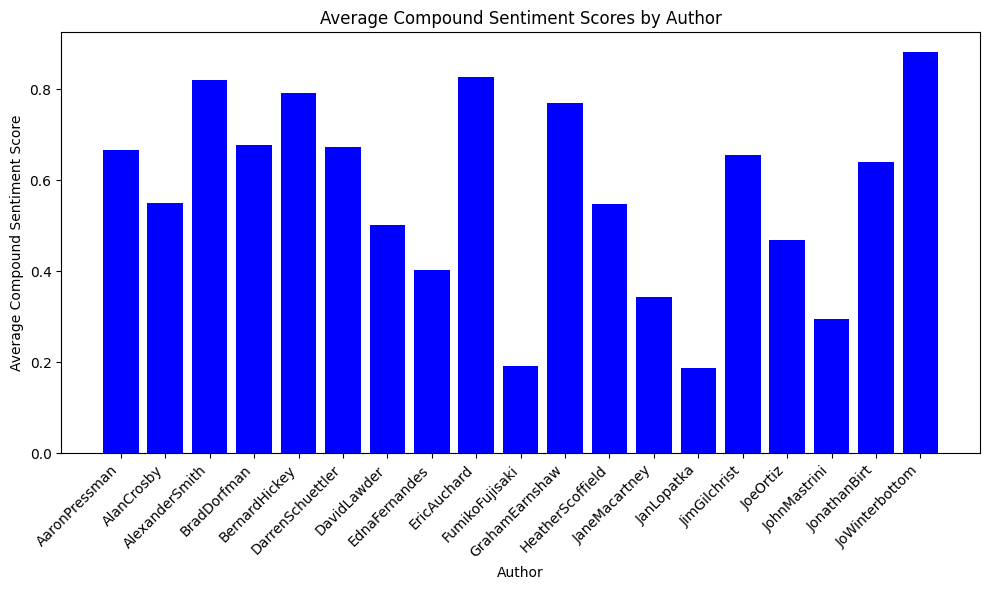

In [6]:
plt.figure(figsize=(10, 6))
plt.bar(author_sentiment_scores.keys(), [df['compound'].mean() for df in author_sentiment_scores.values()], color='blue')
plt.xlabel('Author')
plt.ylabel('Average Compound Sentiment Score')
plt.title('Average Compound Sentiment Scores by Author')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

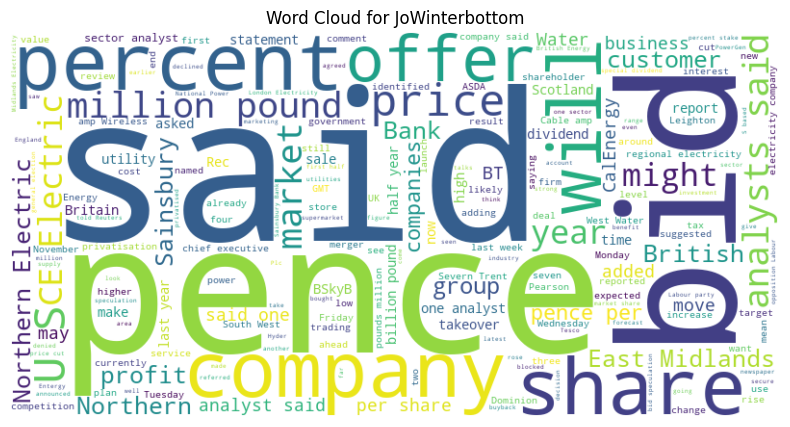

In [7]:
from wordcloud import WordCloud
author_name = "JoWinterbottom"
author_texts = [train_texts[index] for index, label in enumerate(train_labels) if label == author_name]
combined_text = ' '.join(author_texts)

# Generate a WordCloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {author_name}')
plt.show()

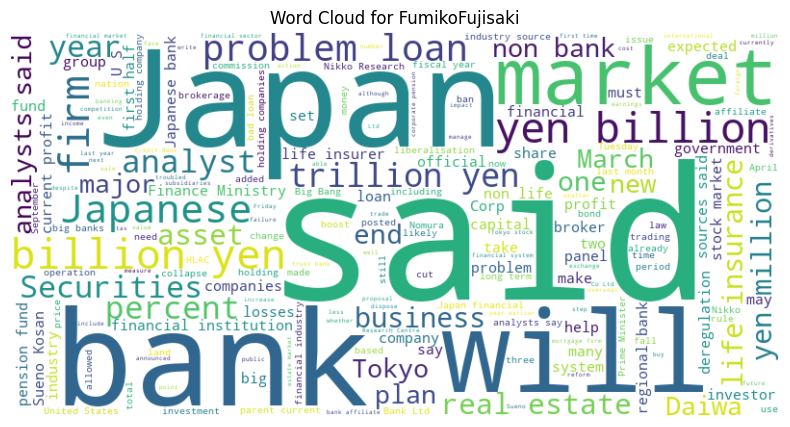

In [13]:
from wordcloud import WordCloud
author_name = "FumikoFujisaki"
author_texts = [train_texts[index] for index, label in enumerate(train_labels) if label == author_name]
combined_text = ' '.join(author_texts)

# Generate a WordCloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {author_name}')
plt.show()

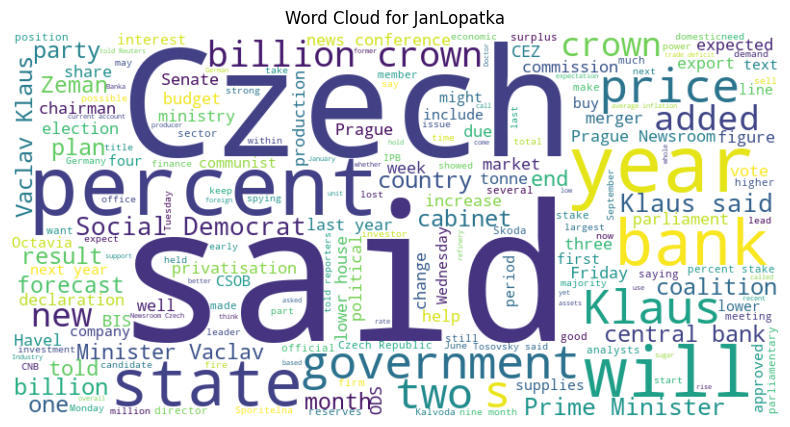

In [14]:
from wordcloud import WordCloud
author_name = "JanLopatka"
author_texts = [train_texts[index] for index, label in enumerate(train_labels) if label == author_name]
combined_text = ' '.join(author_texts)

# Generate a WordCloud from the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {author_name}')
plt.show()

# Results: I created a bar chart of the authors and looked at each sentiment score. As you can see, Jo Winterbottom had the highest positive score. I then looked at the most negative ones which were Jan Lopatka and Fumiko Fujisaki. Seeing this, I decided to do a word cloud of the words they wrote.

# Conclusion: As you can see from the results above, the most positive author was Jo Winterbottom. After conducting a word cloud based on the Jo Winterbottom's texts, the most popular words are things such as pence, said, bid , percent. You can tell from these words that Jo writes about financial markets and most likely stocks. As some of the other words used are share, offer, company etc. This makes sense that Jo's writings would be positive as they are likely talking about stocks they think are good and want people to buy. They would use a lot of positive words and sentiments to try and get people to buy the stocks. 

# The most negative authors, Jan and Fumiko talk about the Czech and Japanese banks respectively. The negative sentiments are most likely due to talking about how badly banks are doing and since Jan also talks about the government, Jan may view the governments effect on the economy unfavorably. 

# This is interesting as one thing you can do is if you are trying to see how someone views a particular subject, instead of reading the entire file, you can just conduct a sentiment analysis and get a general idea of how they feel towards the subject.